# Introduction

Perkenalkan kami dari kelompok 3 kelas KS08 program Python for Data Science Kampus Merdeka x Hacktiv8. Sebelum masuk ke materi izinkan kami memperkenalkan kelompok kami terlebih dahulu :

1. Fasal Alif Haikal Irawan
2. Diki Dwi Aji
3. Mely Sekhan

Pada final project kali ini kami memilih untuk menggunakan data pasien penyakit jantung yang sudah disediakan oleh kode.id untuk memprediksi ***Keselamatan pasien dari penyakit jantung*** yang ada didalam dataset tersebut. Terdapat *299 rows* dan *13 columns* didalam dataset tersebut.

Informasi tentang atribut yang ada dalam dataset tersebut sebagai berikut ini :
1. age - umur pasien
2. anaemia - apakah ada pengurangan haemoglobin
3. creatinine_phosphokinase - level enzim CPK dalam mcg/L
4. diabetes - apakah pasien punya riwayat diabetes
5. ejection_fraction - persentase darah yang meninggalkan jantung dalam persentasi di setiap kontraksi jantung
6. high_blood_pressure - apakah pasien punya darah tinggi
7. platelets - jumlah platelet di darah dalam kiloplatelets/mL
8. serum_creatinine - level serum creatinine di darah dalam mg/dL
9. serum_sodium - level serum sodium di darah dalam mEq/L
10. sex - apakah pasien pria atau wanita
11. smoking - apakah pasien merokok
12. time - waktu dalam hari untuk follow-up
13. DEATH_EVENT - apakah pasien sudah meninggal saat waktu follow-up

# Import Library

Tahap awal selalu diawali dengan import library yang kita butuhkan untuk keperluan proses data heart_failure

In [1]:
# Main Library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

# Model Library
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Data Loading

Setelah import library kita akan melihat secara sekilas tentang data heart_failure

In [2]:
df_heart_failure = pd.read_csv("heart_failure_clinical_records_dataset.csv")

In [3]:
df_heart_failure.shape

(299, 13)

In [4]:
df_heart_failure.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
df_heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# Data Cleaning 

Pada tahap ini, kita akan melihat apakah data heart_failure memiliki missing_value, data yang diduplikasi atau memiliki korelasi antara kolom satu dengan yang lainnya. hal ini diperlukan untuk memastikan saat membuat model nanti dan memberi latihan pada model, model tidak kebingungan dengan data yang missing atau duplikat atau korelasi.

In [6]:
df_heart_failure.isna()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,False,False,False,False,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
df_heart_failure.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
294    False
295    False
296    False
297    False
298    False
Length: 299, dtype: bool

In [8]:
df_heart_failure.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [9]:
df_heart_failure.duplicated().sum()

0

In [10]:
def plot_corr(df_heart_failure, size=14):
    corr = df_heart_failure.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns)
    plt.yticks(range(len(corr.columns)), corr.columns)

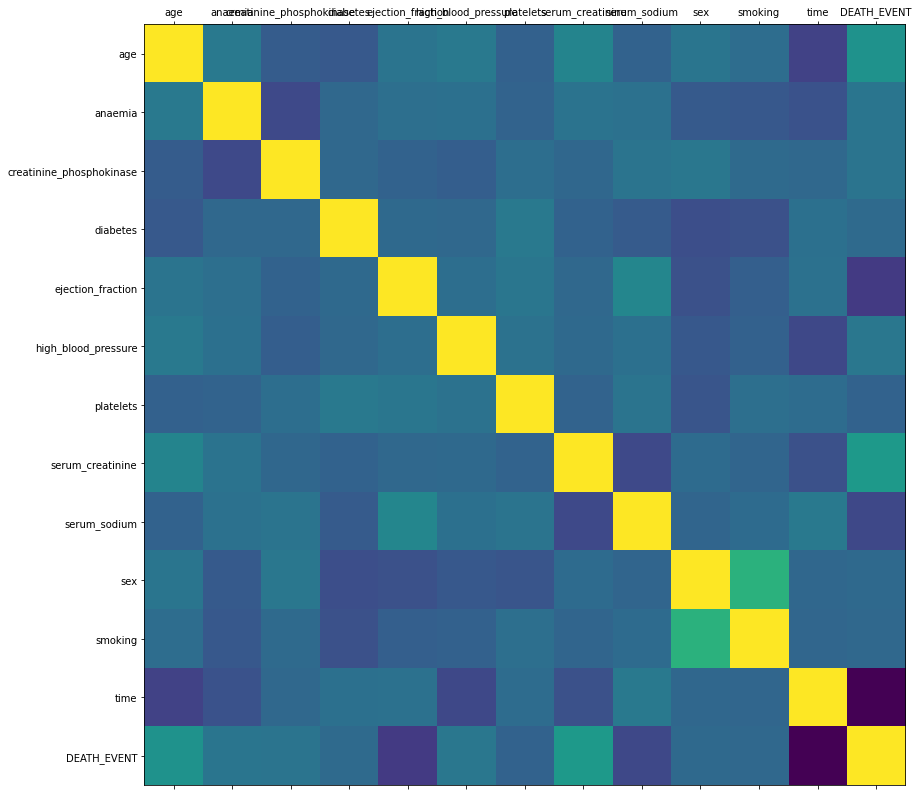

In [11]:
plot_corr(df_heart_failure)

In [12]:
print("# rows missing creatinine_phosphokinase : {0}".format(len(df_heart_failure.loc[df_heart_failure['creatinine_phosphokinase'] == 0])))
print("# rows missing ejection_fraction : {0}".format(len(df_heart_failure.loc[df_heart_failure['ejection_fraction'] == 0])))
print("# rows missing platelets : {0}".format(len(df_heart_failure.loc[df_heart_failure['platelets'] == 0])))
print("# rows missing serum_creatinine : {0}".format(len(df_heart_failure.loc[df_heart_failure['serum_creatinine'] == 0])))
print("# rows missing serum_sodium : {0}".format(len(df_heart_failure.loc[df_heart_failure['serum_sodium'] == 0])))

# rows missing creatinine_phosphokinase : 0
# rows missing ejection_fraction : 0
# rows missing platelets : 0
# rows missing serum_creatinine : 0
# rows missing serum_sodium : 0


In [13]:
df_heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Seperti yang kita lihat tidak ada missing value, data tidak memiliki korelasi dengan kolom lain, dan tidak ada data yang duplikat berarti data_heart_failure aman untuk kita eksplorasi data-nya.

# Explorasi Data

Kita akan mulai tahap selanjutnya, yaitu mengekplorasi data dari heart_failure untuk mendapatkan insight tentang data tersebut.

In [14]:
df_heart_failure['DEATH_EVENT'].value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [15]:
df_heart_failure.groupby('DEATH_EVENT').mean()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,58.761906,0.408867,540.054187,0.418719,40.26601,0.325123,266657.489901,1.184877,137.216749,0.650246,0.325123,158.339901
1,65.215281,0.479167,670.197917,0.416667,33.46875,0.406250,256381.044792,1.835833,135.375000,0.645833,0.312500,70.885417


In [16]:
df_heart_failure.groupby('DEATH_EVENT').median()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
DEATH_EVENT,,,,,,,,,,,,
0,60.0,0.0,245.0,0.0,38.0,0.0,263000.0,1.0,137.0,1.0,0.0,172.0
1,65.0,0.0,259.0,0.0,30.0,0.0,258500.0,1.3,135.5,1.0,0.0,44.5


Kita juga akan mengecek secara sederhana menggunakan mean dan median dari data heart_failure

In [17]:
jumlah_gagal_jantung = len(df_heart_failure)
jumlah_true =  len(df_heart_failure[df_heart_failure['DEATH_EVENT']==1])
jumlah_false = len(df_heart_failure[df_heart_failure['DEATH_EVENT']==0])

print("Jumlah orang selamat : {0} ({1:2.2f}%)".format(jumlah_false, (jumlah_false/jumlah_gagal_jantung) * 100))
print("Jumlah orang gagal jantung : {0} ({1:2.2f}%)".format(jumlah_true, (jumlah_true/jumlah_gagal_jantung) * 100))

Jumlah orang selamat : 203 (67.89%)
Jumlah orang gagal jantung : 96 (32.11%)


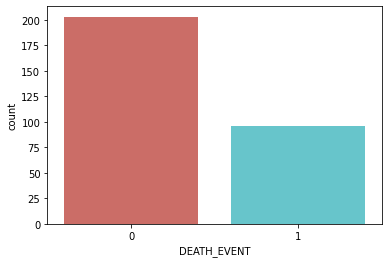

In [18]:
sns.countplot(x='DEATH_EVENT', data=df_heart_failure, palette='hls')
plt.show()

Disini terlihat terjadi **unbalance data** dimana data 0 lebih banyak dari data 1

Text(0, 0.5, 'Frequency')

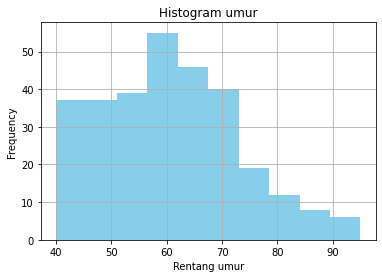

In [19]:
df_heart_failure.age.hist(color='skyblue')
plt.title('Histogram umur')
plt.xlabel('Rentang umur')
plt.ylabel('Frequency')

Kita juga dapat mengetahui rentang umur berapa terkena gagal jantung

# Data Preprocessing 

Pada train test split kali ini kita akan menggunakan test_size sebanyak 70 train dan 30 test

In [20]:
df_heart_failure.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [21]:
feature_col_names = ['age', 'anaemia', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'serum_sodium', 'sex', 'smoking']
predict_class_names = ['DEATH_EVENT']

X = df_heart_failure[feature_col_names].values
y = df_heart_failure[predict_class_names].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
print("{0:0.2f}% ada pada training set".format((len(X_train)/len(df_heart_failure.index)) * 100))
print("{0:0.2f}% ada pada test set".format((len(X_test)/len(df_heart_failure.index)) * 100))

69.90% ada pada training set
30.10% ada pada test set


In [23]:
print("Jumlah ORIGINAL orang selamat : {0} ({1:2.2f}%)".format(len(df_heart_failure.loc[df_heart_failure['DEATH_EVENT'] == 0]), (len(df_heart_failure.loc[df_heart_failure['DEATH_EVENT'] == 0])/len(df_heart_failure.index)) * 100))
print("Jumlah ORIGINAL orang gagal jantung : {0} ({1:2.2f}%)".format(len(df_heart_failure.loc[df_heart_failure['DEATH_EVENT'] == 1]), (len(df_heart_failure.loc[df_heart_failure['DEATH_EVENT'] == 1])/len(df_heart_failure.index)) * 100))
print("")
print("Training True : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1]) / len(y_train) * 100)))
print("Training False : {0} ({1:2.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0]) / len(y_train) * 100)))
print("")
print("Testing True : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1]) / len(y_test) * 100)))
print("Testing False : {0} ({1:2.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0]) / len(y_test) * 100)))

Jumlah ORIGINAL orang selamat : 203 (67.89%)
Jumlah ORIGINAL orang gagal jantung : 96 (32.11%)

Training True : 59 (28.23%)
Training False : 150 (71.77%)

Testing True : 37 (41.11%)
Testing False : 53 (58.89%)


# Model Defining

Pada tahapan ini kita akan mulai mendefinisikan model mulai dari Logistik Regression, K-Nearest Neighbour, Decision Tree, Random Forest, Naive Bayes dan Support Vector Machine. 

Akan tetapi kita akan mulai dari Naive Bayes terlebih dahulu agar data belajar tentang dataset heart_failure sehingga dapat memprediksi data selanjutnya karena feature kolom akan diberikan nilai/bobot oleh Naive Bayes, lalu dilanjutkan dengan Logistic Regression yang akan menghasilkan 0 atau 1 setelah diberikan nilai/bobot oleh Naive Bayes Terakhir kita akan menggunakan model Decision Tree untuk melihat secara visual pengambilan prediksinya. 

# Model Training

Kita akan memulai untuk melatih model dan memilih model mana yang memiliki tingkat akurasi, presisi dan recall yang baik

## Naive Bayes

In [24]:
gnb = GaussianNB()

gnb.fit(X_train, y_train.ravel())

GaussianNB()

In [25]:
gnb_predict_train = gnb.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, gnb_predict_train)))

Accuracy: 0.7656


In [26]:
gnb_predict_test = gnb.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, gnb_predict_test)))

Accuracy: 0.6667


In [27]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, gnb_predict_test)))

Confusion Matrix
[[48  5]
 [25 12]]


In [28]:
print("Classification Report")
print(metrics.classification_report(y_test, gnb_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.91      0.76        53
           1       0.71      0.32      0.44        37

    accuracy                           0.67        90
   macro avg       0.68      0.61      0.60        90
weighted avg       0.68      0.67      0.63        90



## Random Forest

In [29]:
clf = RandomForestClassifier(random_state=42, n_estimators=10)

clf.fit(X_train, y_train.ravel())

RandomForestClassifier(n_estimators=10, random_state=42)

In [30]:
clf_predict_train = clf.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, clf_predict_train)))

Accuracy: 0.9665


In [31]:
clf_predict_test = clf.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, clf_predict_test)))

Accuracy: 0.6333


In [32]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, clf_predict_test)))

Confusion Matrix
[[48  5]
 [28  9]]


In [33]:
print("Classification Report")
print(metrics.classification_report(y_test, clf_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.91      0.74        53
           1       0.64      0.24      0.35        37

    accuracy                           0.63        90
   macro avg       0.64      0.57      0.55        90
weighted avg       0.64      0.63      0.58        90



## Logistic Regression

In [34]:
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train.ravel())

c:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
log_reg_predict_train = log_reg.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, log_reg_predict_train)))

Accuracy: 0.7656


In [36]:
log_reg_predict_test = log_reg.predict(X_test)

print("logistic_regression_predict_test", log_reg_predict_test)
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, log_reg_predict_test)))

logistic_regression_predict_test [0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 1 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0]
Accuracy: 0.6778


In [37]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, log_reg_predict_test)))

Confusion Matrix
[[50  3]
 [26 11]]


In [38]:
print("Classification Report")
print(metrics.classification_report(y_test, log_reg_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.66      0.94      0.78        53
           1       0.79      0.30      0.43        37

    accuracy                           0.68        90
   macro avg       0.72      0.62      0.60        90
weighted avg       0.71      0.68      0.63        90



## Decision Tree

In [39]:
rclf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

rclf.fit(X_train, y_train.ravel())

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [40]:
import pydotplus
from IPython.display import Image
from sklearn import tree

In [41]:
dot_data = tree.export_graphviz(rclf.fit(X_train, y_train.ravel()), out_file=None, feature_names=None, class_names=['YA', 'TIDAK'], rounded=True, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)

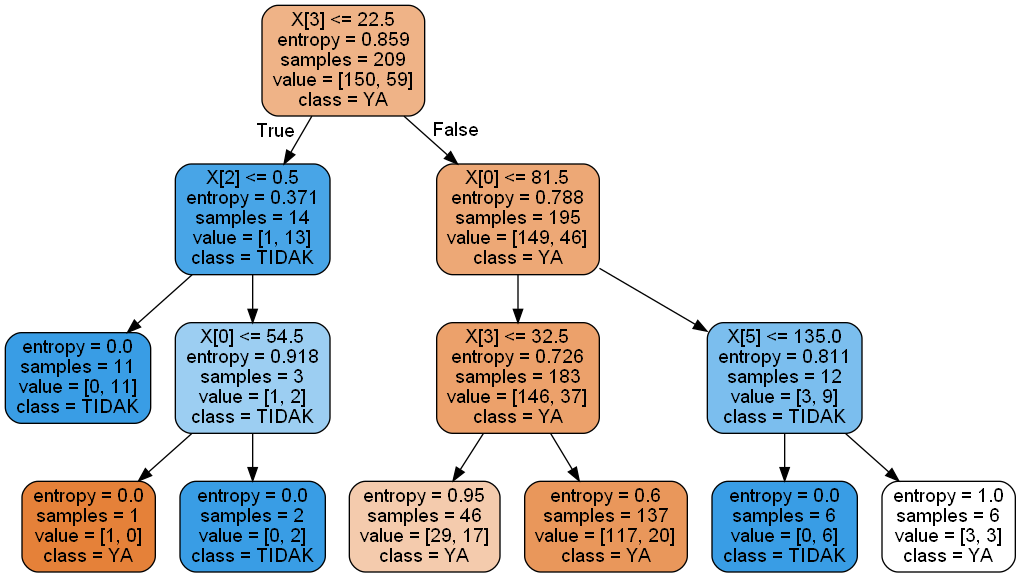

In [42]:
Image(graph.create_png())

In [43]:
rclf_predict_train = rclf.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, rclf_predict_train)))

Accuracy: 0.8086


In [44]:
rclf_predict_test = rclf.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, rclf_predict_test)))

Accuracy: 0.6444


In [45]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, rclf_predict_test)))

Confusion Matrix
[[50  3]
 [29  8]]


In [46]:
print("Classification Report")
print(metrics.classification_report(y_test, rclf_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.63      0.94      0.76        53
           1       0.73      0.22      0.33        37

    accuracy                           0.64        90
   macro avg       0.68      0.58      0.55        90
weighted avg       0.67      0.64      0.58        90



## KNN

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train.ravel())

KNeighborsClassifier()

In [48]:
knn_predict_train = knn.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, knn_predict_train)))

Accuracy: 0.7990


In [49]:
knn_predict_test = knn.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, knn_predict_test)))

Accuracy: 0.6111


In [50]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, knn_predict_test)))

Confusion Matrix
[[49  4]
 [31  6]]


In [51]:
print("Classification Report")
print(metrics.classification_report(y_test, knn_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.61      0.92      0.74        53
           1       0.60      0.16      0.26        37

    accuracy                           0.61        90
   macro avg       0.61      0.54      0.50        90
weighted avg       0.61      0.61      0.54        90



## SVM

In [52]:
SVM = svm.SVC()

SVM.fit(X_train, y_train.ravel())

SVC()

In [53]:
SVM_predict_train = SVM.predict(X_train)

from sklearn import metrics
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_train, SVM_predict_train)))

Accuracy: 0.7177


In [54]:
SVM_predict_test = SVM.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, SVM_predict_test)))

Accuracy: 0.5889


In [55]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, SVM_predict_test)))

Confusion Matrix
[[53  0]
 [37  0]]


In [56]:
print("Classification Report")
print(metrics.classification_report(y_test, SVM_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.59      1.00      0.74        53
           1       0.00      0.00      0.00        37

    accuracy                           0.59        90
   macro avg       0.29      0.50      0.37        90
weighted avg       0.35      0.59      0.44        90



c:\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Python\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Model Evaluation

In [57]:
print('Accuracy of naive bayes : {:.2f}'.format(gnb.score(X_test, y_test)))
print('Accuracy of random forest : {:.2f}'.format(clf.score(X_test, y_test)))
print('Accuracy of logistic regression : {:.2f}'.format(log_reg.score(X_test, y_test)))
print('Accuracy of decision tree : {:.2f}'.format(rclf.score(X_test, y_test)))
print('Accuracy of KNN : {:.2f}'.format(knn.score(X_test, y_test)))
print('Accuracy of SVM : {:.2f}'.format(SVM.score(X_test, y_test)))

Accuracy of naive bayes : 0.67
Accuracy of random forest : 0.63
Accuracy of logistic regression : 0.68
Accuracy of decision tree : 0.64
Accuracy of KNN : 0.61
Accuracy of SVM : 0.59


Dapat kita lihat bahwa ***logistic regression memiliki nilai palinf tinggi diantara model lainnya*** dan kita akan memilih logistic regression lalu kita latih model-nya.

Sebelum itu bagaimana jika kita perbaiki dulu unbalance data pada tahap sebelumnya agar model dapat bekerja dengan baik.

1st max value of 0.676 occured at C=0.100


Text(0, 0.5, 'recall score')

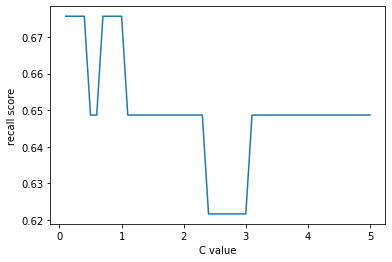

In [58]:
C_start = 0.1
C_end = 5
C_inc = 0.1

C_values, recall_scores = [], []

C_val = C_start
best_recall_score = 0
while (C_val < C_end):
    C_values.append(C_val)
    lr_model_loop = LogisticRegression(C=C_val, class_weight="balanced", random_state=42, solver='liblinear', max_iter=500)
    lr_model_loop.fit(X_train, y_train.ravel())
    lr_predict_loop_test = lr_model_loop.predict(X_test)
    recall_score = metrics.recall_score(y_test, lr_predict_loop_test)
    recall_scores.append(recall_score)
    if (recall_score > best_recall_score) :
        best_recall_score = recall_score
        best_lr_predict_test = lr_predict_loop_test
        
    C_val = C_val + C_inc
    
best_score_C_val = C_values[recall_scores.index(best_recall_score)]
print("1st max value of {0:.3f} occured at C={1:.3f}".format(best_recall_score, best_score_C_val))

%matplotlib inline
plt.plot(C_values, recall_scores, "-")
plt.xlabel("C value")
plt.ylabel("recall score")

Selajutnya kita akan coba untuk memanggil kembali model yang sebelumnya sudah kita coba tapi kali data unbalance sudah kita atasi.

In [59]:
log_reg = LogisticRegression(class_weight='balanced', C=best_score_C_val, random_state=42, solver='liblinear')

log_reg.fit(X_train, y_train.ravel())

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')

In [60]:
log_reg_predict_test = log_reg.predict(X_test)

print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, log_reg_predict_test)))

Accuracy: 0.7111


In [61]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, log_reg_predict_test)))

Confusion Matrix
[[39 14]
 [12 25]]


In [62]:
print("Classification Report")
print(metrics.classification_report(y_test, log_reg_predict_test))

Classification Report
              precision    recall  f1-score   support

           0       0.76      0.74      0.75        53
           1       0.64      0.68      0.66        37

    accuracy                           0.71        90
   macro avg       0.70      0.71      0.70        90
weighted avg       0.71      0.71      0.71        90



Akurasi dari logistik regression meningkat sehingga recall dan f1-score juga meningkat walaupun tidak sampai 70 tetapi sudah cukup memuaskan.

In [63]:
import pickle
pickle.dump(log_reg, open('./model/model_FP3.pkl', 'wb'))

In [64]:
lr_model = pickle.load(open("./model/model_FP3.pkl", "rb"))

Model sudah di simpan dan siap untuk dicoba ke dataset lain.

# Model Inference 

Selanjutnya akan kita coba model yang sudah kita buat dengan dataset lain. disini kita memakai dataset diabetes untuk percobaan-nya.

## Data loading

In [65]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [66]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Data Cleaning

In [68]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [69]:
data.duplicated().sum()

0

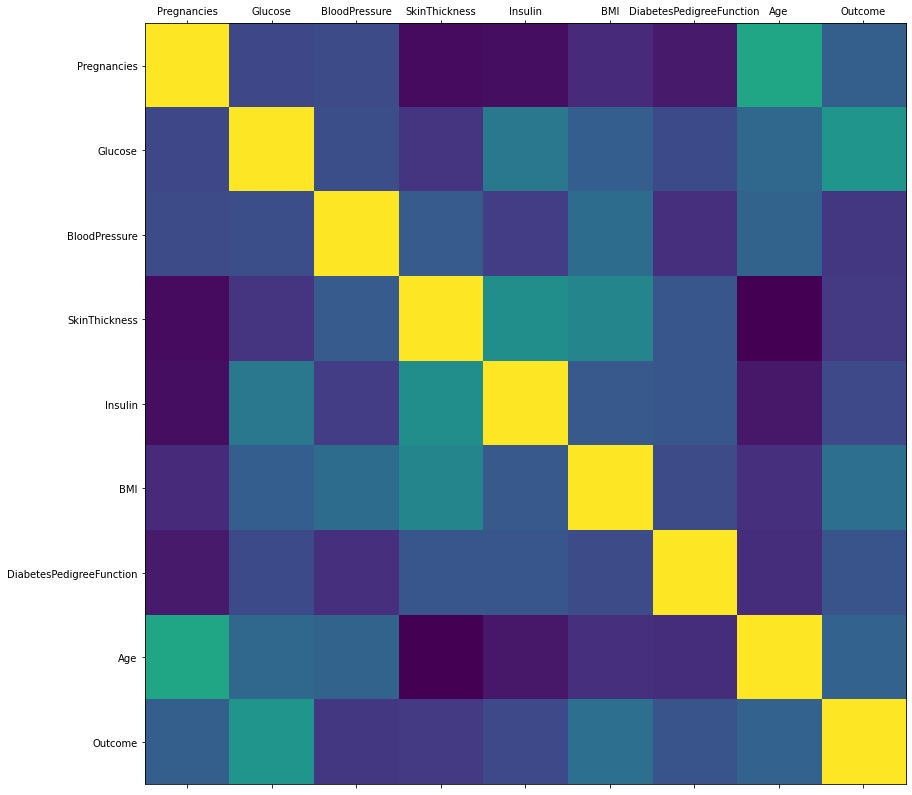

In [70]:
plot_corr(data)

Dataset sudah clean jadi tidak perlu kita drop atau ubah kolomnya.

## Data Preprocessing 

In [71]:
df_diabetes = data.drop(['Outcome'], axis=1)

In [72]:
X = df_diabetes.values
y = data.loc[:, data.columns == 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

## Model Training

In [74]:
y_pred = lr_model.predict(X_test)

## Model Evaluation

In [75]:
print("Accuracy: {0:.4f}".format(metrics.accuracy_score(y_test, y_pred)))

Accuracy: 0.3810


In [76]:
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, y_pred)))

Confusion Matrix
[[ 18 129]
 [ 14  70]]


In [77]:
print("Classification Report")
print(metrics.classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.56      0.12      0.20       147
           1       0.35      0.83      0.49        84

    accuracy                           0.38       231
   macro avg       0.46      0.48      0.35       231
weighted avg       0.49      0.38      0.31       231



Kita mendapatkan nilai akurasi yang cukup buruk di angka 38%. Hal ini dapat salah satunya karena tidak mengatasi data unbalanced sehingga nilai accuracy berkurang dan kurang maksimal.

# Conclusion 

Setelah melakukan berbagai tahapan diatas, dapat disimpulkan model dapat berjalan dengan baik. baik itu dalam dataset yang sebelumnya dibuat atau dataset yang baru saja kita coba. walaupun berjalan dengan baik model harus masih memerlukan perbaikan agar dapat menghasil-kan nilai akurasi yang tinggi untuk kedepannya.

Berdasarkan hasil dari analisis keseluruhan, dapat disimpulkan bahwa :

1. Project ini membahas tentang mengimplementasikan algoritma Supervised Learning. Metode yang digunakan untuk menyelesaikan permasalahannya adalah naive bayes, random forest, logistic regression, decision tree, KNN, dan SVM .

2. Untuk menyeimbangkan data kita membuat sebuah function tersendiri yang akan di-implementasikan di model Linear Regression.

3. Diperoleh nilai accuracy tertinggi pada model Linear Regression.

4. Melakukan export model untuk di deploy pada website

5. Mencoba model yang sudah di export ke dalam dataset lain dan didapatkan nilai accuracy kurang memuaskan hanya 38% hal itu terjadi karena kita tidak menyeimbangkan data yang akan di uji-coba.